# Challenge 1

It might seem to be intuitive that bikeshare users would travel in the reverse direction in the evening than in
the morning. But how true is that? If that's the case, would it reduce the value of convenience of bikeshares being available everywhere, and should they just get their own bikes? Do we also need a crew to pick up and restore all the bikes to initial distributions across the city before the next morning?

a) Find out what percentage of bikes are returned to its initial location?

b) How many bikeshare trips usually visit more than just start/end points, but visited some other points before
the end of the day?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_18Q1 = pd.read_csv("Documents/Toronto Bikeshare Data/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv")
df_18Q2 = pd.read_csv("Documents/Toronto Bikeshare Data/bikeshare2018/Bike Share Toronto Ridership_Q2 2018.csv")
df_18Q3 = pd.read_csv("Documents/Toronto Bikeshare Data/bikeshare2018/Bike Share Toronto Ridership_Q3 2018.csv")
df_18Q4 = pd.read_csv("Documents/Toronto Bikeshare Data/bikeshare2018/Bike Share Toronto Ridership_Q4 2018.csv")
df_bikeshare = pd.concat([df_18Q1,df_18Q2,df_18Q3,df_18Q4],ignore_index = True)

<b>Banyak perjalanan berdasarkan musim di toronto<b>

In [3]:
#banyak perjalanan berdasarkan musim di toronto
print('Banyak perjalanan yang dilakukan di musim dingin:', df_18Q1.shape[0], 'perjalanan')
print('Banyak perjalanan yang dilakukan di musim semi:', df_18Q2.shape[0], 'perjalanan')
print('Banyak perjalanan yang dilakukan di musim panas:', df_18Q3.shape[0], 'perjalanan')
print('Banyak perjalanan yang dilakukan di musim gugur:', df_18Q4.shape[0], 'perjalanan')

Banyak perjalanan yang dilakukan di musim dingin: 178559 perjalanan
Banyak perjalanan yang dilakukan di musim semi: 558370 perjalanan
Banyak perjalanan yang dilakukan di musim panas: 822536 perjalanan
Banyak perjalanan yang dilakukan di musim gugur: 363490 perjalanan


In [4]:
df_bikeshare.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member


In [5]:
df_bikeshare.describe(include="all")

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
count,1.922955e+06,1.922955e+06,1.922955e+06,1922955,1922955,1922955,1.922955e+06,1922955,1922955
unique,NaN,NaN,NaN,366574,359,366328,NaN,359,2
top,NaN,NaN,NaN,6/19/2018 17:27,York St / Queens Quay W,6/20/2018 17:35,NaN,York St / Queens Quay W,Annual Member
freq,NaN,NaN,NaN,43,24017,46,NaN,25754,1572980
mean,3.490799e+06,9.629760e+02,7.134140e+03,NaN,NaN,NaN,7.133976e+03,NaN,NaN
std,6.248957e+05,1.595530e+03,1.034228e+02,NaN,NaN,NaN,1.035460e+02,NaN,NaN
min,2.383648e+06,6.000000e+01,7.000000e+03,NaN,NaN,NaN,7.000000e+03,NaN,NaN
25%,2.955252e+06,4.220000e+02,7.042000e+03,NaN,NaN,NaN,7.042000e+03,NaN,NaN
50%,3.494072e+06,6.700000e+02,7.109000e+03,NaN,NaN,NaN,7.107000e+03,NaN,NaN
75%,4.027558e+06,1.051000e+03,7.222000e+03,NaN,NaN,NaN,7.222000e+03,NaN,NaN


In [6]:
df_bikeshare.isnull().values.any()

False

In [7]:
df_bikeshare.dtypes

trip_id                   int64
trip_duration_seconds     int64
from_station_id           int64
trip_start_time          object
from_station_name        object
trip_stop_time           object
to_station_id             int64
to_station_name          object
user_type                object
dtype: object

In [8]:
df_bikeshare["from_station_id"].unique

<bound method Series.unique of 0          7018
1          7184
2          7235
3          7202
4          7004
           ... 
1922950    7088
1922951    7030
1922952    7020
1922953    7014
1922954    7299
Name: from_station_id, Length: 1922955, dtype: int64>

In [9]:
df_bikeshare.shape

(1922955, 9)

In [10]:
df_bikeshare["start_time"] = pd.to_datetime(df_bikeshare["trip_start_time"])

In [11]:
df_bikeshare["start_time"] = df_bikeshare.start_time.dt.strftime("%Y-%m")

In [12]:
df_bikeshare["stop_time"] = pd.to_datetime(df_bikeshare["trip_stop_time"])

In [13]:
df_bikeshare["stop_time"] = df_bikeshare.stop_time.dt.strftime("%Y-%m")

In [14]:
df_bikeshare.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,start_time,stop_time
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member,2018-01,2018-01
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member,2018-01,2018-01
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member,2018-01,2018-01
3,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member,2018-01,2018-01
4,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member,2018-01,2018-01


<b>Groupby Trip Duration Seconds Berdasarkan Start Time dan User Type<b>

In [15]:
df_group1 = df_bikeshare[["start_time","user_type","trip_duration_seconds"]]
df_groupby1 = df_group1.groupby(["start_time","user_type"]).mean()
df_groupby1 = df_groupby1.reset_index()
df_groupby1

,start_time,user_type,trip_duration_seconds
0,2018-01,Annual Member,624.493560
1,2018-01,Casual Member,1557.002878
2,2018-02,Annual Member,635.746806
3,2018-02,Casual Member,1888.351120
4,2018-03,Annual Member,623.545797
5,2018-03,Casual Member,1872.471507
6,2018-04,Annual Member,666.784327
7,2018-04,Casual Member,2283.854397
8,2018-05,Annual Member,736.799955
9,2018-05,Casual Member,2489.743726


<b>Groupby Trip Duration Seconds Berdasarkan User Type<b>

In [16]:
df_group2 = df_bikeshare[["user_type","trip_duration_seconds"]]
df_groupby2 = df_group2.groupby(["user_type"]).mean()
df_groupby2 = df_groupby2.reset_index()
df_groupby2

,user_type,trip_duration_seconds
0,Annual Member,725.016745
1,Casual Member,2032.495773


<b>Bar Chart Type User vs Trip Duration<b>

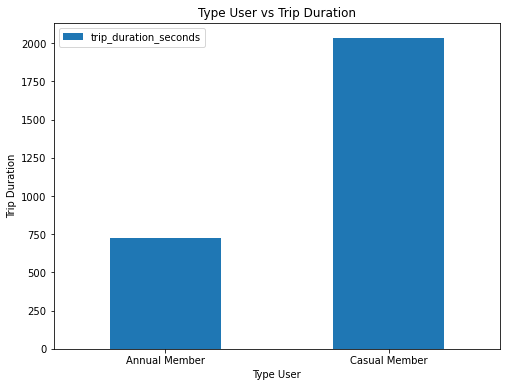

In [17]:
df_groupby2.plot(kind='bar', x ="user_type", y="trip_duration_seconds", rot=0, figsize=(8, 6))

plt.xlabel('Type User') # add to x-label to the plot
plt.ylabel('Trip Duration') # add y-label to the plot
plt.title('Type User vs Trip Duration') # add title to the plot

plt.show()

<b>Pie Chart Type User vs Trip Duration<b>

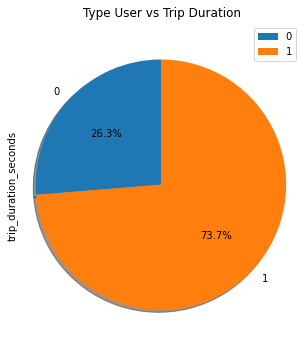

In [18]:
df_groupby2["trip_duration_seconds"].plot(kind='pie', legend=True,
                    figsize=(5, 6),
                    autopct='%1.1f%%', # add in percentages
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,       # add shadow
                    )

plt.title('Type User vs Trip Duration')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

<b>Rata-rata Perjalan Pengguna dengan Sepeda<b>

In [19]:
rerata = df_bikeshare['trip_duration_seconds'].mean()
print('Rata-rata pengguna menggunakan sepeda selama:', int(rerata), 'detik')

Rata-rata pengguna menggunakan sepeda selama: 962 detik


<b>Lima Durasi Trip Penggunaan Sepeda Teratas<b>

In [20]:
df_longtrip = df_bikeshare[df_bikeshare["trip_duration_seconds"]>=3600]
df_longtrip = df_longtrip.sort_values('trip_duration_seconds', ascending=False).reset_index()
df_longtrip[["trip_id","trip_duration_seconds","from_station_name","to_station_name","user_type"]].head()

,trip_id,trip_duration_seconds,from_station_name,to_station_name,user_type
0,2393792,55077,Front St W / Blue Jays Way,Baldwin Ave / Spadina Ave - SMART,Annual Member
1,4250894,54971,King St W / Bay St (West Side),Bathurst Subway Station,Casual Member
2,2923541,54965,York St / Queens Quay W,Augusta Ave / Dundas St W,Casual Member
3,2990624,54955,Riverdale Park South (Broadview Ave),Riverdale Park South (Broadview Ave),Casual Member
4,3631190,54880,Queens Quay / Yonge St,Elizabeth St / Edward St (Bus Terminal),Annual Member


<b>Lima Durasi Trip Penggunaan Sepeda Terbawah<b>

In [21]:
df_shorttrip = df_bikeshare[df_bikeshare["trip_duration_seconds"]<3600]
df_shorttrip = df_shorttrip.sort_values('trip_duration_seconds').reset_index()
df_shorttrip[["trip_id","trip_duration_seconds","from_station_name","to_station_name","user_type"]].head()

,trip_id,trip_duration_seconds,from_station_name,to_station_name,user_type
0,3998966,60,Union Station,Union Station,Annual Member
1,3036952,60,Sherbourne St / Wellesley St E,Sherbourne St / Wellesley St E,Annual Member
2,4349105,60,Sherbourne St / Wellesley St E,Sherbourne St / Wellesley St E,Annual Member
3,3551589,60,Bay St / St. Joseph St,Bay St / St. Joseph St,Annual Member
4,3376859,60,Phoebe St / Spadina Ave,Phoebe St / Spadina Ave,Annual Member


<b>Lokasi Awal Penggunaan Sepeda<b>

In [22]:
from_station_counts = df_bikeshare["from_station_name"].value_counts()
from_station_counts_fix = pd.DataFrame(from_station_counts).reset_index()
from_station_counts_fix

,index,from_station_name
0,York St / Queens Quay W,24017
1,Bay St / Queens Quay W (Ferry Terminal),22743
2,Union Station,19869
3,Bay St / Wellesley St W,19184
4,Sherbourne St / Wellesley St E,19131
...,...,...
354,Rosedale Park (20 Schofield Ave),259
355,Primrose Ave / Davenport Rd,201
356,Erskine Ave / Yonge St SMART,190
357,Mortimer Ave / Carlaw Ave SMART,125


<b>Lokasi Akhir Penggunaan Sepeda<b>

In [23]:
to_station_counts = df_bikeshare["to_station_name"].value_counts()
to_station_counts_fix = pd.DataFrame(to_station_counts).reset_index()
to_station_counts_fix

,index,to_station_name
0,York St / Queens Quay W,25754
1,Union Station,25673
2,Bay St / Queens Quay W (Ferry Terminal),24248
3,Princess St / Adelaide St E,19986
4,Dundas St W / Yonge St,18540
...,...,...
354,Hocken Ave./Vaughan Rd.,182
355,Erskine Ave / Yonge St SMART,154
356,Primrose Ave / Davenport Rd,144
357,Mortimer Ave / Carlaw Ave SMART,109


<b>Jumlah Kelebihan Sepeda Yang Kembali Ke York St<b>

In [24]:
York_St_bikes = to_station_counts_fix["to_station_name"].iloc[0] - from_station_counts_fix["from_station_name"].iloc[0]
York_St_bikes

1737

<b>Jumlah Kelebihan Sepeda Yang Kembali Ke Union_Station<b>

In [25]:
Union_Station_bikes = to_station_counts_fix["to_station_name"].iloc[1] - from_station_counts_fix["from_station_name"].iloc[2]
Union_Station_bikes

5804

<b>Jumlah Kekurangan Sepeda Yang Kembali Ke Primrose Ave<b>

In [26]:
Primrose_Ave_bikes = to_station_counts_fix["to_station_name"].iloc[356] - from_station_counts_fix["from_station_name"].iloc[355]
Primrose_Ave_bikes

-57

<b>Lima Lokasi Awal Teratas Penggunaan Sepeda<b>

In [27]:
from_station_counts_head = from_station_counts_fix.head(5)
from_station_counts_head

,index,from_station_name
0,York St / Queens Quay W,24017
1,Bay St / Queens Quay W (Ferry Terminal),22743
2,Union Station,19869
3,Bay St / Wellesley St W,19184
4,Sherbourne St / Wellesley St E,19131


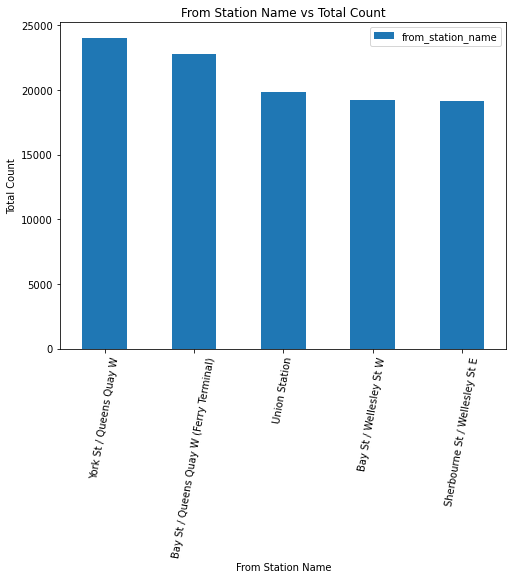

In [28]:
from_station_counts_head.plot(kind='bar', x ="index", y="from_station_name", rot=80, figsize=(8, 6))

plt.xlabel('From Station Name') # add to x-label to the plot
plt.ylabel('Total Count') # add y-label to the plot
plt.title('From Station Name vs Total Count') # add title to the plot

plt.show()

<b>Lima Lokasi Awal Terbawah Penggunaan Sepeda<b>

In [29]:
from_station_counts_tail = from_station_counts_fix.tail(5)
from_station_counts_tail

,index,from_station_name
354,Rosedale Park (20 Schofield Ave),259
355,Primrose Ave / Davenport Rd,201
356,Erskine Ave / Yonge St SMART,190
357,Mortimer Ave / Carlaw Ave SMART,125
358,Wolfpack - 7219,1


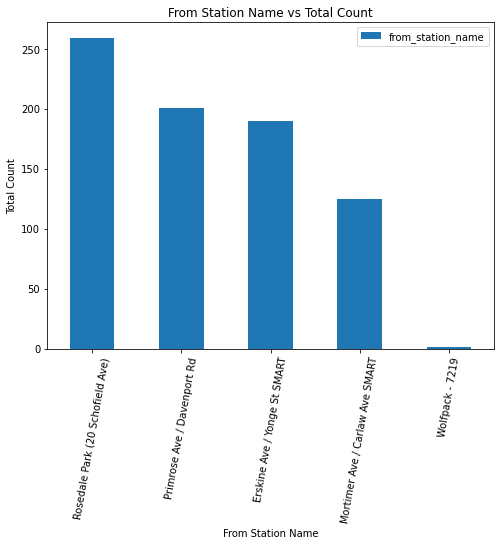

In [30]:
from_station_counts_tail.plot(kind='bar', x ="index", y="from_station_name", rot=80, figsize=(8, 6))

plt.xlabel('From Station Name') # add to x-label to the plot
plt.ylabel('Total Count') # add y-label to the plot
plt.title('From Station Name vs Total Count') # add title to the plot

plt.show()

<b>Lima Lokasi Tujuan/Akhir Teratas Penggunaan Sepeda<b>

In [31]:
to_station_counts_head = to_station_counts_fix.head(5)
to_station_counts_head

,index,to_station_name
0,York St / Queens Quay W,25754
1,Union Station,25673
2,Bay St / Queens Quay W (Ferry Terminal),24248
3,Princess St / Adelaide St E,19986
4,Dundas St W / Yonge St,18540


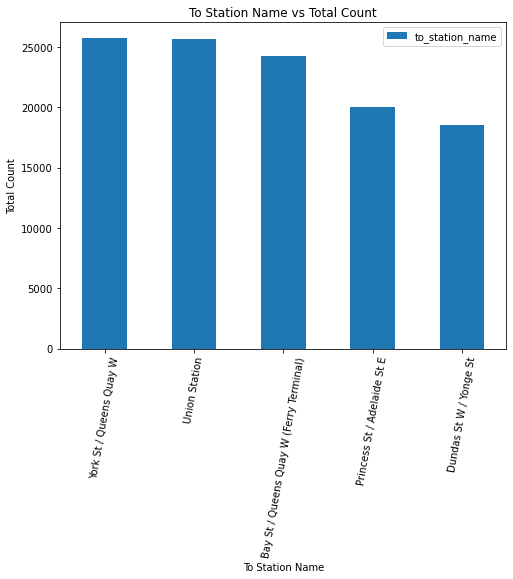

In [32]:
to_station_counts_head.plot(kind='bar', x ="index", y="to_station_name", rot=80, figsize=(8, 6))

plt.xlabel('To Station Name') # add to x-label to the plot
plt.ylabel('Total Count') # add y-label to the plot
plt.title('To Station Name vs Total Count') # add title to the plot

plt.show()

<b>Lima Lokasi Tujuan/Akhir Terbawah Penggunaan Sepeda<b>

In [33]:
to_station_counts_tail = to_station_counts_fix.tail(5)
to_station_counts_tail

,index,to_station_name
354,Hocken Ave./Vaughan Rd.,182
355,Erskine Ave / Yonge St SMART,154
356,Primrose Ave / Davenport Rd,144
357,Mortimer Ave / Carlaw Ave SMART,109
358,Wolfpack - 7219,4


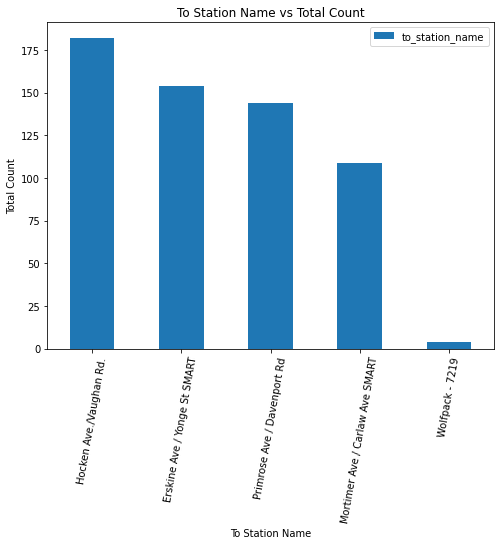

In [34]:
to_station_counts_tail.plot(kind='bar', x ="index", y="to_station_name", rot=80, figsize=(8, 6))

plt.xlabel('To Station Name') # add to x-label to the plot
plt.ylabel('Total Count') # add y-label to the plot
plt.title('To Station Name vs Total Count') # add title to the plot

plt.show()

<b>Perbandingan Jumlah Annual vs Casual Member<b>

In [35]:
user_type_counts = df_bikeshare["user_type"].value_counts()
user_type_counts_fix = pd.DataFrame(user_type_counts).reset_index()
user_type_counts_fix

,index,user_type
0,Annual Member,1572980
1,Casual Member,349975


<b>Perbandingan Jumlah Annual vs Casual Member dalam Bar Chart<b>

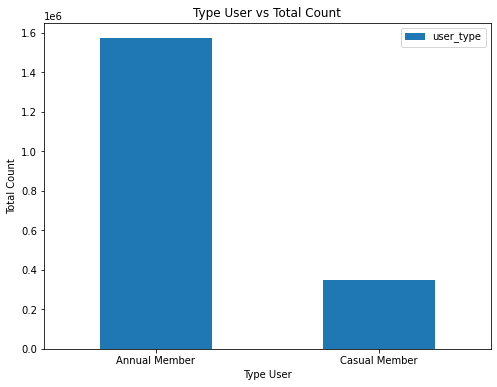

In [36]:
user_type_counts_fix.plot(kind='bar', x ="index", y="user_type", rot=0, figsize=(8, 6))

plt.xlabel('Type User') # add to x-label to the plot
plt.ylabel('Total Count') # add y-label to the plot
plt.title('Type User vs Total Count') # add title to the plot

plt.show()

<b>Perbandingan Jumlah Annual vs Casual Member dalam Pie Chart<b>

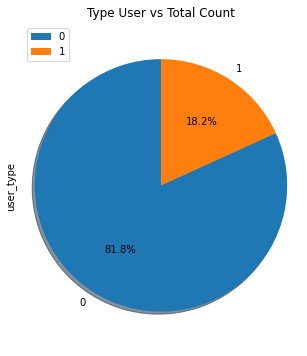

In [37]:
user_type_counts_fix["user_type"].plot(kind='pie', legend=True,
                    figsize=(5, 6),
                    autopct='%1.1f%%', # add in percentages
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,       # add shadow
                    )

plt.title('Type User vs Total Count')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

<b>Membuat Data Frame Yang Nilai Features from_station_name = York St / Queens Quay W<b>

In [39]:
york = df_bikeshare[df_bikeshare['from_station_name']=='York St / Queens Quay W']
york.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,start_time,stop_time
388,2384191,1311,7076,1/2/2018 8:43,York St / Queens Quay W,1/2/2018 9:05,7285,Spadina Ave / Harbord St - SMART,Annual Member,2018-01,2018-01
450,2384273,601,7076,1/2/2018 9:14,York St / Queens Quay W,1/2/2018 9:24,7101,Lower Sherbourne St / The Esplanade,Annual Member,2018-01,2018-01
482,2384325,392,7076,1/2/2018 9:34,York St / Queens Quay W,1/2/2018 9:41,7068,Dockside Dr / Queens Quay E (Sugar Beach),Annual Member,2018-01,2018-01
799,2384864,504,7076,1/2/2018 16:30,York St / Queens Quay W,1/2/2018 16:38,7075,Queens Quay W / Dan Leckie Way,Annual Member,2018-01,2018-01
811,2384889,1071,7076,1/2/2018 16:35,York St / Queens Quay W,1/2/2018 16:53,7113,Parliament St / Aberdeen Ave,Annual Member,2018-01,2018-01


<b>Rata-rata Trip Duration Yang Perjalanan Awal Dimulai di York St / Queens Quay W<b>

In [40]:
york['trip_duration_seconds'].mean()

1631.4018820002498

In [41]:
col_tostation_list = york['to_station_name'].unique()
col_tostation_list.shape

(315,)

<b>Tujuan Trip Akhir/ Goal Dimana Tujuan Awal Dimulai di York St / Queens Quay W<b>

In [42]:
york['to_station_name'].unique()

array(['Spadina Ave / Harbord St - SMART',
       'Lower Sherbourne St / The Esplanade',
       'Dockside Dr / Queens Quay E (Sugar Beach)',
       'Queens Quay W / Dan Leckie Way', 'Parliament St / Aberdeen Ave',
       'Dundas St E / Broadview Ave', 'Queens Quay / Yonge St',
       'Bathurst St/Queens Quay(Billy Bishop Airport)',
       'Fort York Blvd / Garrison Rd', 'Navy Wharf Ct. / Bremner Blvd.',
       'Cherry St / Mill St', 'King St W / Spadina Ave',
       'Mill St / Tannery Rd', 'Fort York  Blvd / Capreol Ct',
       'Bathurst St / Fort York Blvd', 'HTO Park (Queens Quay W)',
       'King St W / Stafford St', 'Roncesvalles Ave / Marmaduke St',
       'Metro Hall Plaza', 'Spadina Ave / Fort York Blvd',
       'King St W / Tecumseth St', 'Simcoe St / Queen St W',
       'Lakeshore Blvd W / The Boulevard Club',
       'Simcoe St / Wellington St South', 'Temperance St. Station',
       'Stewart St / Bathurst St  - SMART',
       'University Ave / Gerrard St W', 'Wellington St W 

<b>Durasi Trip dalam Seconds di Quartal Pertama<b>

In [44]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

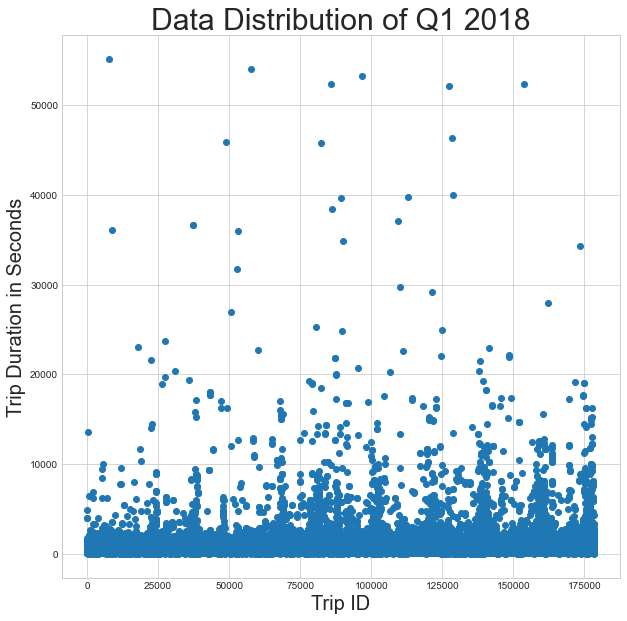

In [45]:
plt.figure(figsize=(10,10))
plt.title('Data Distribution of Q1 2018', fontsize=30)
plt.xlabel('Trip ID', fontsize=20)
plt.ylabel('Trip Duration in Seconds', fontsize= 20)
plt.scatter(df_18Q1.index, df_18Q1['trip_duration_seconds'])
plt.show()

<b>Durasi Trip dalam Seconds di Quartal Kedua<b>

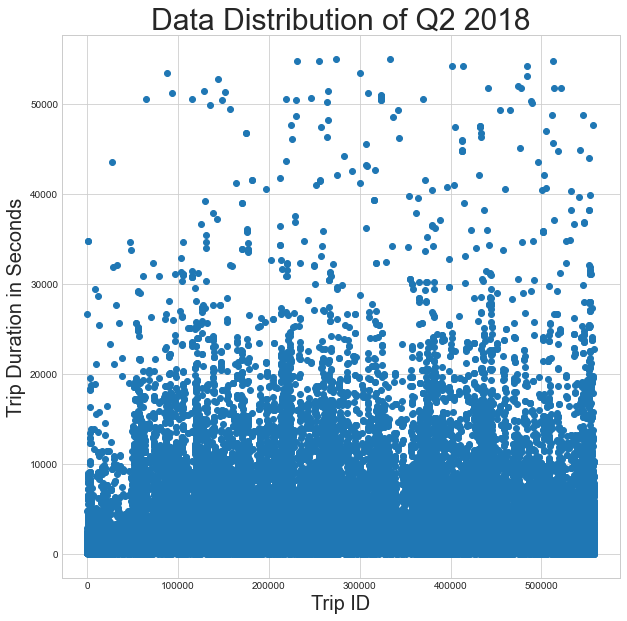

In [46]:
plt.figure(figsize=(10,10))
plt.title('Data Distribution of Q2 2018', fontsize=30)
plt.xlabel('Trip ID', fontsize=20)
plt.ylabel('Trip Duration in Seconds', fontsize= 20)
plt.scatter(df_18Q2.index, df_18Q2['trip_duration_seconds'])
plt.show()

<b>Durasi Trip dalam Seconds di Quartal Ketiga<b>

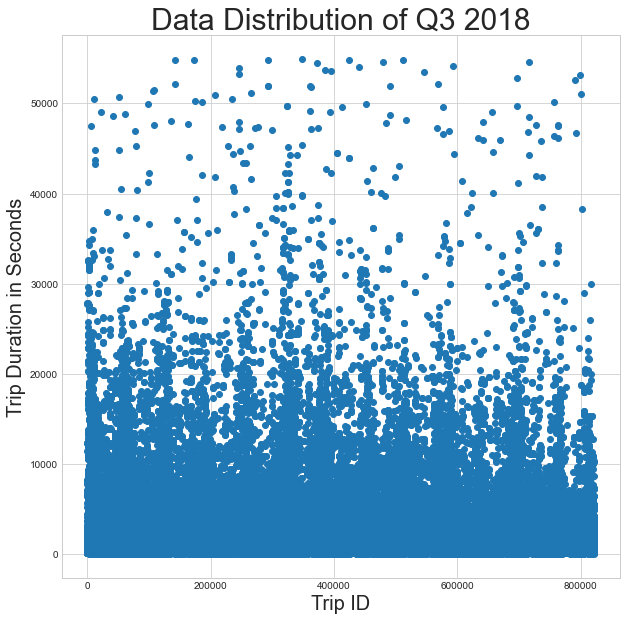

In [48]:
plt.figure(figsize=(10,10))
plt.title('Data Distribution of Q3 2018', fontsize=30)
plt.xlabel('Trip ID', fontsize=20)
plt.ylabel('Trip Duration in Seconds', fontsize= 20)
plt.scatter(df_18Q3.index, df_18Q3['trip_duration_seconds'])
plt.show()

<b>Durasi Trip dalam Seconds di Quartal Keempat<b>

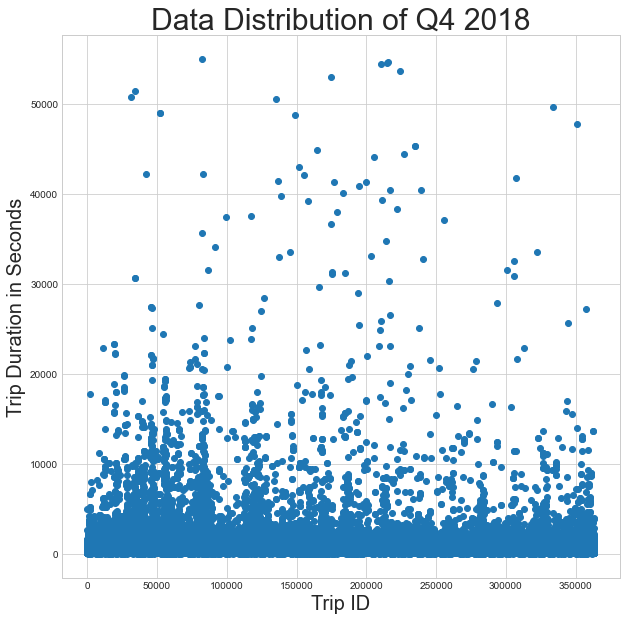

In [49]:
plt.figure(figsize=(10,10))
plt.title('Data Distribution of Q4 2018', fontsize=30)
plt.xlabel('Trip ID', fontsize=20)
plt.ylabel('Trip Duration in Seconds', fontsize= 20)
plt.scatter(df_18Q4.index, df_18Q4['trip_duration_seconds'])
plt.show()